In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

In [2]:
train_X = pd.read_csv('Tk_train_X.csv')
train_y = pd.read_csv('Tk_train_y.csv')
train_val_X = pd.read_csv('Tk_train_val_X.csv')
train_val_y = pd.read_csv('Tk_train_val_y.csv')
valid_X = pd.read_csv('Tk_valid_X.csv')
valid_y = pd.read_csv('Tk_valid_y.csv')
test_X = pd.read_csv('Tk_test_X.csv')
test_y = pd.read_csv('Tk_test_y.csv')

In [3]:
parameters = { 'bootstrap' : [True,False],
               'criterion' : ['mse','mae'],
               'max_depth' : [None,3],
               'max_features' : ['log2','sqrt',3,'auto',None],
               'n_estimators' : [100,200,300,400,500,600,700,800,900,1000,1100],
               'random_state' : [42]
}

gridcv = GridSearchCV(RandomForestRegressor(), parameters, n_jobs = -1,
                      scoring = 'neg_mean_absolute_error',verbose =10, cv = 5)

gridcv.fit(train_val_X,train_val_y)

print(gridcv.score(train_val_X,train_val_y))
print(gridcv.best_params_)

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

-8.399133071604359
{'bootstrap': True, 'criterion': 'mae', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 700, 'random_state': 42}


In [8]:
print(gridcv.best_params_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 900, 'random_state': 42}


In [6]:
r_reg_tokyo_model = RandomForestRegressor(bootstrap = True, criterion = 'mae',
                                         max_depth = None, max_features = 'log2',
                                         n_estimators = 700, random_state = 42)

r_reg_tokyo_model.fit(train_X,train_y)

C:\Users\entity\Anaconda3\envs\capston_design\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=700,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [7]:
train_pre = r_reg_tokyo_model.predict(train_X)
train_mae = mean_absolute_error(train_pre,train_y)

test_pre = r_reg_tokyo_model.predict(test_X)
test_mae = mean_absolute_error(test_pre,test_y)

print("train mae : %s , test mae : %s" %(train_mae,test_mae))

train mae : 8.595487673415823 , test mae : 21.01949756280465


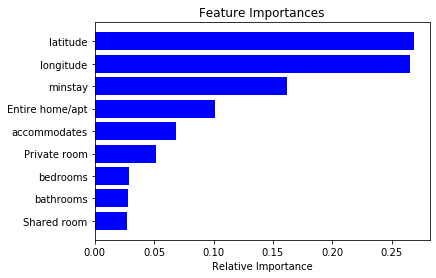

In [8]:
features = train_X.columns
importances = r_reg_tokyo_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [10]:
from sklearn.externals import joblib
joblib.dump(r_reg_tokyo_model,'RandomForest_tokyo_model')

['RandomForest_tokyo_model']